In [12]:
import pandas as pd 
from scipy import integrate as integrate
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import seaborn as sns

plt.rcParams.update({'font.family':'cambria'}) #set cambria as default font family
plt.rcParams["font.weight"] = "bold" # set bold font as default
plt.rcParams["axes.labelweight"] = "bold" # set bold font as default axis label



In [13]:
#---------------------------------------
# Import du fichier csv     Import du fichier csv 
#---------------------------------------

# on importe le fichier csv dans un df panda, on dégage les lignes non desirees avec skiprows
df = pd.read_csv(os.path.join('data','2023_09_25_meteo.csv'), skiprows = [0, 2, 3])

#on passe la colonne de temps au format datetime 
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format = '%Y-%m-%d %H')



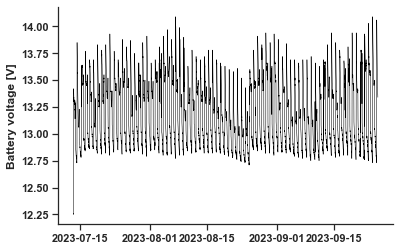

In [14]:

#_____________________
# - - - - - - - - - -
# plot info batterie 
# - - - - - - - - - -
#_____________________

# creation d'un nouveau df avec selection du temps et du voltage batterie 
df_battery = df[['TIMESTAMP', 'BattV_Min']]

# on renomme les colonnes 
df_battery.columns = ['time','battery']


# on plot avec seaborn après avoir défini un theme de vizu 

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

#plot
fig = sns.lineplot(data=df_battery, x = 'time', y = "battery", color = 'black',
                   linewidth = 0.5)
fig.set(xlabel='', ylabel='Battery voltage [V]')
#save the plot and export as png file
plt.savefig(os.path.join('plot_python','batterie_voltage.png'), dpi=400)



In [15]:
#close the plot 
plt.clf()

<Figure size 432x288 with 0 Axes>

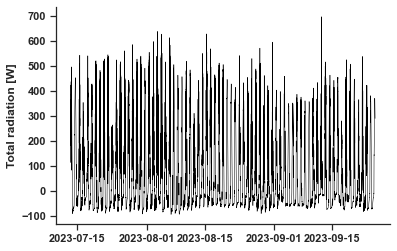

In [16]:
#_____________________
# - - - - - - - - - -
# plot radiation
# - - - - - - - - - -
#_____________________

# creation d'un nouveau df avec selection du temps et des radiations totales
df_radiation = df[['TIMESTAMP', 'NetTot_Avg']]

# on renomme les colonnes 
df_radiation.columns = ['time','radiation']



#plot
fig = sns.lineplot(data=df_radiation, x = 'time', y = "radiation", 
            linewidth = 0.5, color = 'black')
fig.set(xlabel='', ylabel='Total radiation [W]')
plt.savefig(os.path.join('plot_python','radiation.png'), dpi=400)

In [17]:
#close the plot 
plt.clf()

<Figure size 432x288 with 0 Axes>

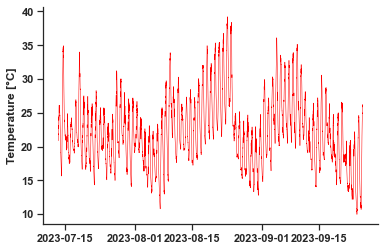

In [18]:
#_____________________
# - - - - - - - - - -
# plot temperature  
# - - - - - - - - - -
#_____________________


# creation d'un nouveau df avec selection du temps et des radiations totales
df_temp_humi = df[['TIMESTAMP', 'AirTC_Avg', 'RH']]

# on renomme les colonnes 
df_temp_humi.columns = ['time','temperature','humidity']



#plot temperature
fig_temp = sns.lineplot(data=df_temp_humi, x = 'time', y = "temperature", 
            linewidth = 0.5, color = 'red')
fig_temp.set(xlabel='', ylabel = 'Temperature [°C]')
plt.savefig(os.path.join('plot_python','temperature_atmospherique.png'), dpi=400)


In [19]:
plt.clf()


<Figure size 432x288 with 0 Axes>

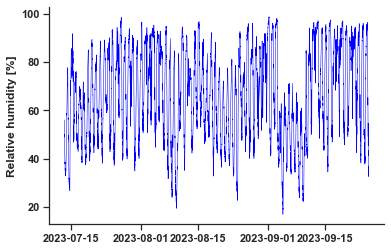

In [20]:
#_____________________
# - - - - - - - - - -
# plot  humidité 
# - - - - - - - - - -
#_____________________

#plot humidite
fig_humi = sns.lineplot(data=df_temp_humi, x = 'time', y = "humidity", 
            linewidth = 0.5, color = 'blue')
fig_humi.set(xlabel='', ylabel = 'Relative humidity [%]')
plt.savefig(os.path.join('plot_python','relative_humidity.png'), dpi=400)


In [21]:
plt.clf()

<Figure size 432x288 with 0 Axes>

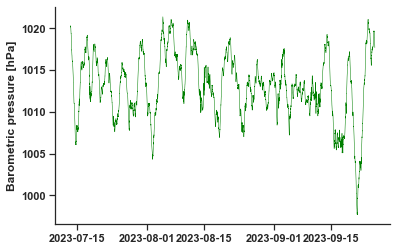

In [22]:
#_____________________
# - - - - - - - - - -
# plot pression atm
# - - - - - - - - - -
#_____________________

# creation d'un nouveau df avec selection du temps et des radiations totales
df_press_atm = df[['TIMESTAMP', 'BV_BP_Avg']]


# on renomme les colonnes 
df_press_atm.columns = ['time','press_atm']

#plot humidite
fig_press_atm = sns.lineplot(data=df_press_atm, x = 'time', y = "press_atm", 
            linewidth = 0.5, color = 'green')
fig_press_atm.set(xlabel='', ylabel = 'Barometric pressure [hPa]')


plt.savefig(os.path.join('plot_python','press_atm.png'), dpi=400)


In [23]:
plt.clf()


<Figure size 432x288 with 0 Axes>

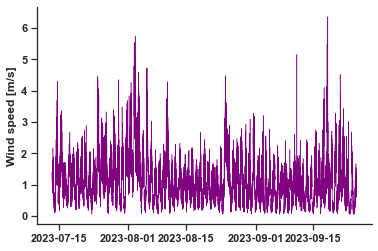

In [24]:
#_____________________
# - - - - - - - - - -
# plot vitesse du vent
# - - - - - - - - - -
#_____________________

# creation d'un nouveau df avec selection du temps et des radiations totales
df_wind_speed = df[['TIMESTAMP', 'WS_ms_Avg']]


# on renomme les colonnes 
df_wind_speed.columns = ['time','wind_speed']

#plot humidite
fig_wind_speed = sns.lineplot(data=df_wind_speed, x = 'time', y = "wind_speed", 
            linewidth = 0.5, color = 'purple')
fig_wind_speed.set(xlabel='', ylabel = 'Wind speed [m/s]')

plt.savefig(os.path.join('plot_python','wind_sepped.png'), dpi=400)




In [25]:
plt.clf()

<Figure size 432x288 with 0 Axes>

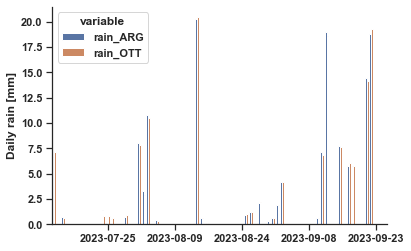

In [26]:
#____________________
# - - - - - - - - - -
# plot de la pluie 
# - - - - - - - - - -
#____________________

#on selectionne les données du pluvio à bascule ARG et du pluvio OTT
df_rain = df[['TIMESTAMP', 'Rain_mm_Tot', 'quant_NTR']]

#on renomme les variables 
df_rain.columns = ['time','rain_ARG', 'rain_OTT']

#on somme la valeur de la pluvio sur une journée
df_rain_day = df_rain.resample('d', on = 'time')['rain_ARG','rain_OTT'].sum()

#on passe le data frame en format long (pratique pour ploter avec seaborn)
df_melt_rain_day = df_rain_day.reset_index().melt(id_vars = 'time')

#on met le temps en index
df_melt_rain_day = df_melt_rain_day.set_index('time')



# on repasse les dates en index au format date (et non datetime, necessaire pour que les dates s'affichent 
# correctement sur l'axe des x du plot) 
df_melt_rain_day.index = pd.to_datetime(df_melt_rain_day.index).date


#plot
fig_rain_day = sns.barplot(data=df_melt_rain_day, x = df_melt_rain_day.index, y = df_melt_rain_day['value'], hue = 'variable')
fig_rain_day.set(xlabel='', ylabel = 'Daily rain [mm]')
#pour avoir un interval de tick de 15 jours sur l'axe des x avec la fonction mdates.DayLocator
fig_rain_day.xaxis.set_major_locator(mdates.DayLocator(interval=15))

#export de la figure en png

plt.savefig(os.path.join('plot_python','dailyrain.png'), dpi=400)


In [27]:
plt.clf()

<Figure size 432x288 with 0 Axes>